# Analyse

## Plot 1 mit festem a

In [ ]:
from src.primality.criteria import *
from src.primality.tests import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime

# Beispielhafte n-Werte
numbers = list(range(100_000, 1_000_000, 100_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000
#numbers = list(range(10_000, 100_000, 10_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000

# Liste von Zahlen, für die die Tests durchgeführt werden sollen
#numbers = [5, 10, 20, 50, 100, 200, 500, 1000]

# Messung der Laufzeiten für jedes Kriterium
fermat_results = measure_runtime(lambda n: fermat_criterion(start=2, n=n), numbers, label="Fermat-Test mit start=2")
wilson_results = measure_runtime(lambda n: wilson_criterion(n), numbers, label="Wilson-Test")
initial_lucas_results = measure_runtime(lambda n: initial_lucas_test(a=2, n=n), numbers, label="Initialer Lucas-Test mit a=2")
lucas_results = measure_runtime(lambda n: lucas_test(start=2, n=n), numbers, label="Lucas-Test mit a=2")
optimized_lucas_results = measure_runtime(lambda n: optimized_lucas_test(n), numbers, label="Optimierter Lucas-Test")

# Vorbereitung der Daten für den Plot
n_fermat = [result["n"] for result in fermat_results]
n_wilson = [result["n"] for result in wilson_results]
n_initial_lucas = [result["n"] for result in initial_lucas_results]
n_lucas = [result["n"] for result in lucas_results]
n_optimized_lucas = [result["n"] for result in optimized_lucas_results]

time_fermat = [result["time"] for result in fermat_results]
time_wilson = [result["time"] for result in wilson_results]
time_initial_lucas = [result["time"] for result in initial_lucas_results]
time_lucas = [result["time"] for result in lucas_results]
time_optimized_lucas = [result["time"] for result in optimized_lucas_results]

labels = [
    "Fermat-Test mit a=2",
    "Wilson-Test",
    "Initialer Lucas-Test mit a=2",
    "Lucas-Test mit a=2",
    "Optimierter Lucas-Test"
]
# Erstellen des Plots
plot_runtime(
    n_lists=[n_fermat, n_wilson, n_initial_lucas, n_lucas, n_optimized_lucas],
    time_lists=[time_fermat, time_wilson, time_initial_lucas, time_lucas, time_optimized_lucas],
    labels=labels
)

TypeError: fermat_criterion() got an unexpected keyword argument 'a'

## Plot 2 mit zufälligem a 

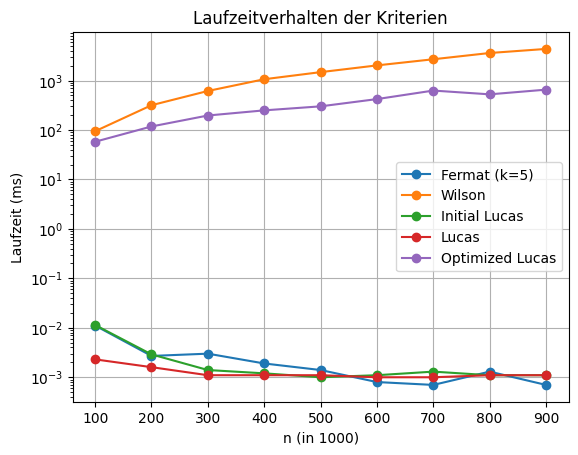

In [ ]:
from src.primality.criteria import *
from src.primality.tests import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime

# Beispielhafte n-Werte
numbers = list(range(100_000, 1_000_000, 100_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000
#numbers = list(range(10_000, 100_000, 10_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000

# Messung der Laufzeiten
fermat_times = measure_runtime(lambda n: fermat_criterion(n, 5), numbers, "Fermat (k=5)")
wilson_times = measure_runtime(wilson_criterion, numbers, "Wilson")
initial_lucas_times = measure_runtime(initial_lucas_test, numbers, "Initial Lucas")
lucas_times = measure_runtime(lucas_test, numbers, "Lucas")
optimized_lucas_times = measure_runtime(optimized_lucas_test, numbers, "Optimized Lucas")

# Vorbereitung der Plot-Daten
n_values = [result["n"] for result in fermat_times]
time_data = [
    [result["time"] for result in fermat_times],
    [result["time"] for result in wilson_times],
    [result["time"] for result in initial_lucas_times],
    [result["time"] for result in lucas_times],
    [result["time"] for result in optimized_lucas_times]
]
labels = ["Fermat (k=5)", "Wilson", "Initial Lucas", "Lucas", "Optimized Lucas"]

# Erstelle den Plot
plot_runtime(
    n_lists=[n_values] * len(time_data),  # Gleiche n-Werte für alle
    time_lists=time_data,
    labels=labels
)

## Plot 3 verbessert


Teste n = 13877
Fermat: ✅ Prim
   a=8832→✓ | a=4306→✓ | a=12241→✓
    ⏱ Best: 0.01ms | Avg: 0.01ms | Worst: 0.01ms
Wilson: ✅ Prim (kein a)
    ⏱ Best: 3.13ms | Avg: 3.13ms | Worst: 3.13ms
Initial Lucas: ❌ Zusammengesetzt
  a=9579: Bedingung 1 ✓
  ⚠️ Abbruch bei m=3469
    ⏱ Best: 3.38ms | Avg: 3.38ms | Worst: 3.38ms
Lucas: ❌ Zusammengesetzt
  a=7021: Bedingung 1 ✓
  ⚠️ Abbruch bei m=6938
    ⏱ Best: 0.25ms | Avg: 0.25ms | Worst: 0.25ms
Optimierter Lucas: ✅ Prim
  q=2: a=2→✓
  q=3469: a=2→✓
    ⏱ Best: 0.01ms | Avg: 0.01ms | Worst: 0.01ms

Teste n = 22702
Fermat: ❌ Zusammengesetzt
   a=19123→✗
    ⏱ Best: 0.00ms | Avg: 0.00ms | Worst: 0.00ms
Wilson: ❌ Zusammengesetzt (kein a)
    ⏱ Best: 7.09ms | Avg: 7.09ms | Worst: 7.09ms
Initial Lucas: ❌ Zusammengesetzt
  a=13089: Bedingung 1 ✗
    ⏱ Best: 0.00ms | Avg: 0.00ms | Worst: 0.00ms
Lucas: ❌ Zusammengesetzt
  a=11863: Bedingung 1 ✗
    ⏱ Best: 0.00ms | Avg: 0.00ms | Worst: 0.00ms
Optimierter Lucas: ❌ Zusammengesetzt
  q=3: a=2→✗ | a=3→✗ | 

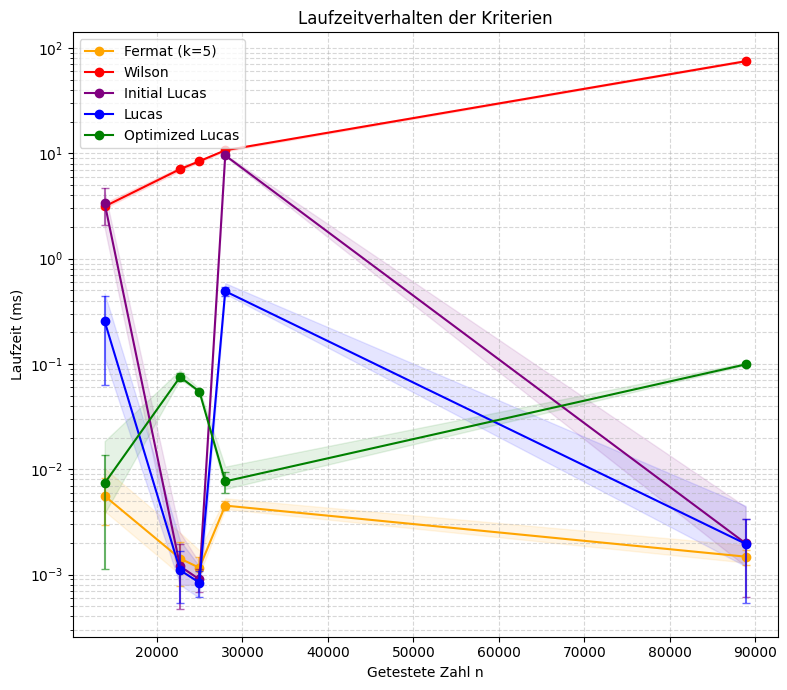

In [3]:
from src.primality.criteria import *
from src.primality.tests import *
from src.primality.criteriaProtocoll import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime
from src.analysis.dataset import *
import random
from sympy import isprime, primerange

# Input n random numbers between 100,000 and 1,000,000 from a mix of primes and composites
def generate_numbers(n, start=10_000, end=100_000):
    p = random.sample(list(primerange(start, end)), n)
    c = random.sample([x for x in range(start, end) if not isprime(x)], n)
    return random.sample(p + c, n)

random.seed(42)
numbers_list = generate_numbers(5)
numbers = sorted(numbers_list)


# Measure criteria runtimes
fermat_times = measure_runtime(lambda n: fermat_criterion(n, 5), numbers, "Fermat (k=5)", repeat=5)
wilson_times = measure_runtime(wilson_criterion, numbers, "Wilson", repeat=5)
initial_lucas_times = measure_runtime(initial_lucas_test, numbers, "Initial Lucas", repeat=5)
lucas_times = measure_runtime(lucas_test, numbers, "Lucas", repeat=5)
optimized_lucas_times = measure_runtime(optimized_lucas_test, numbers, "Optimized Lucas", repeat=5)

# save results
save_json(fermat_times, get_timestamped_filename("criteria", "json"))
export_to_csv(fermat_times, get_timestamped_filename("criteria", "csv"))

# protocoll
datasets = {"Fermat (k=5)": fermat_times,"Wilson": wilson_times,"Initial Lucas": initial_lucas_times,"Lucas": lucas_times,"Optimized Lucas": optimized_lucas_times}
criteria_protocoll(numbers, datasets)

# create datasets for plotting
datasets = [fermat_times, wilson_times, initial_lucas_times, lucas_times, optimized_lucas_times]
n_values = [[entry["n"] for entry in data] for data in datasets]
std_devs = [[entry["std_dev"] for entry in data] for data in datasets]
best_times = [[entry["best_time"] for entry in data] for data in datasets]
worst_times = [[entry["worst_time"] for entry in data] for data in datasets]
avg_times = [[entry["avg_time"] for entry in data] for data in datasets]
colors = ["orange", "red", "purple", "blue", "green"]
labels = [data[0]["label"] for data in datasets]

# Plot
plot_runtime(n_lists=n_values, time_lists=avg_times, std_lists=std_devs, best_lists=best_times, worst_lists=worst_times, labels=labels, colors=colors, figsize=(8, 7))
